# Airlines Delay

### Project developed by:
- Adam Nogueira (up202007519)
- Eduardo Silva (up202004999)
- João Félix (up202008867)

## Table of Contents



## Introduction
This project involves developing a data mining case study, which is described in a separate document provided on Moodle. The main focus of the project is a predictive data mining task, the details of which are outlined in the case study description.




### Bibliography
NumPy Developers, Numpy documentation, URL: https://numpy.org/doc/stable/user/index.html#user <br>
pandas development team, pandas documentation, URL: https://pandas.pydata.org/docs/user_guide/index.html#user-guide<br>
Matplotlib Development team, Matplotlib documentation, URL: https://matplotlib.org/stable/index.html <br>
scikit-learn developers, scikit-learn documentation, URL: https://scikit-learn.org/0.18/documentation.html<br>

### Approach

The approach to this project was done as follows:

1. **Data analysis**: First we analyzed the dataset to inspect for the need for data pre-processing: checked the corresponding histograms, class distribution, and the existence of missing or null values.
2. **Algorithm implementation**: Flowing that, we defined the training and test sets using train/test split, resampled the dataset, and applied the SciKit Learn's algorithms to obtain the first results.
3. **Evaluation and refinement**: After analyzing the first results, tunning of each algorithm was done utilizing the SciKit Learn GridSearchCV to find the parameters of each algorithm that yielded the best overall results, and evaluated the final results.

### Used Libraries

- **NumPy**: Provides a fast numerical array structure and helper functions.
- **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **matplotlib**: The essential Machine Learning package in Python.
- **sklearn**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **seaborn**: Advanced statistical plotting library.
- **pycaret**: Offers streamlined workflows and a wide range of pre-built algorithms and techniques to experiment with different models and compare their performance using different evaluation metrics.


## Data analysis

We start by importing the required libraries and plotting some graphs for initial analysis of the dataset.

In [ ]:
import data_manip
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from enum import Enum
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%pip install imbalanced-learn


# Set the warning filter to "ignore"
warnings.filterwarnings("ignore", category=UserWarning)

awards = pd.read_csv('modified_data/awards_players.csv', na_values=['NA'], delimiter=",")
coaches = pd.read_csv('modified_data/coaches.csv', na_values=['NA'], delimiter=",")
players = pd.read_csv('modified_data/players.csv', na_values=['NA'], delimiter=",")
players_teams = pd.read_csv('modified_data/players_teams.csv', na_values=['NA'], delimiter=",")
series_post = pd.read_csv('modified_data/series_post.csv', na_values=['NA'], delimiter=",")
teams = pd.read_csv('modified_data/teams.csv', na_values=['NA'], delimiter=",")
teams_post = pd.read_csv('modified_data/teams_post.csv', na_values=['NA'], delimiter=",")


print(teams)

In [ ]:
# Custom formatting function
def custom_format(value):
    # Check if the value is a number (int or float)
    if isinstance(value, (int, float)):
        # If it's an integer, format as an integer
        if isinstance(value, int):
            return value
        # If it's a float, format with 2 decimal places
        elif isinstance(value, float):
            return round(value, 2)
    else:
        return value

formatted_df = teams.applymap(custom_format)
formatted_df.describe()

Tabela com a contagem de vezes que cada equipa foi aos playoffs

                        Name  Playoff Appearances
0         Los Angeles Sparks                    9
1        Sacramento Monarchs                    8
2              Detroit Shock                    7
3           New York Liberty                    7
4              Seattle Storm                    7
5            Connecticut Sun                    6
6             Houston Comets                    6
7              Indiana Fever                    6
8         Washington Mystics                    5
11           Charlotte Sting                    3
12           Phoenix Mercury                    3
9   San Antonio Silver Stars                    3
10         Cleveland Rockers                    3
13               Utah Starzz                    2
14            Minnesota Lynx                    2
15           Orlando Miracle                    1
16                 Miami Sol                    1
17             Atlanta Dream                    1


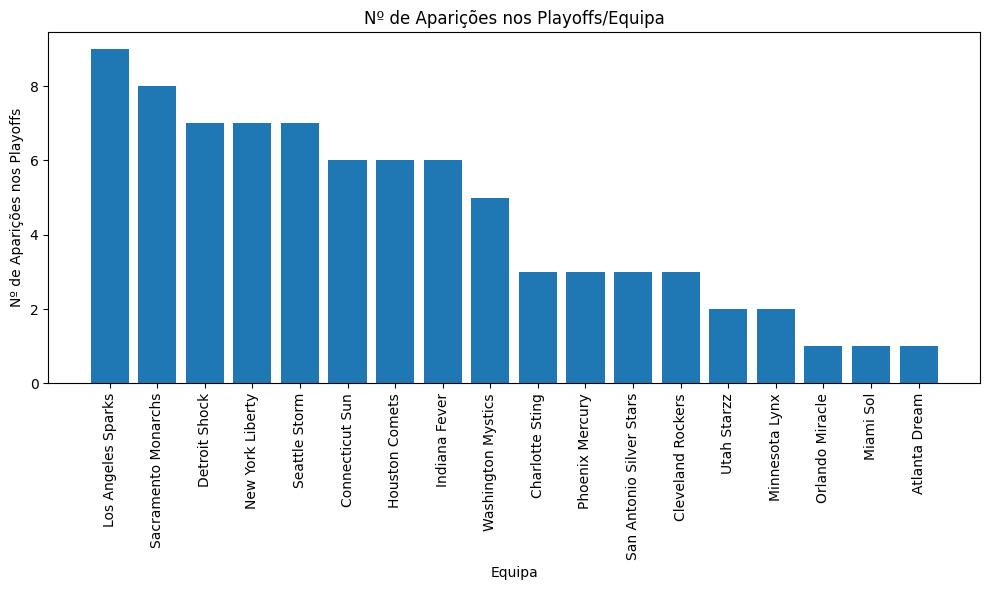

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

teams_df = pd.read_csv('./modified_data/teams.csv')

playoff_teams = teams_df[teams_df['playoff'] == 'Y']

playoff_count = playoff_teams['name'].value_counts().reset_index()
playoff_count.columns = ['Name', 'Playoff Appearances']

playoff_count = playoff_count.sort_values(by='Playoff Appearances', ascending=False)
print(playoff_count)

plt.figure(figsize=(10, 6))
plt.bar(playoff_count['Name'], playoff_count['Playoff Appearances'])
plt.xlabel('Equipa')
plt.ylabel('Nº de Aparições nos Playoffs')
plt.title('Nº de Aparições nos Playoffs/Equipa')
plt.xticks(rotation=90) 
plt.tight_layout()

plt.show()

Tabela que retorna a média de idades das jogadoras por equipas

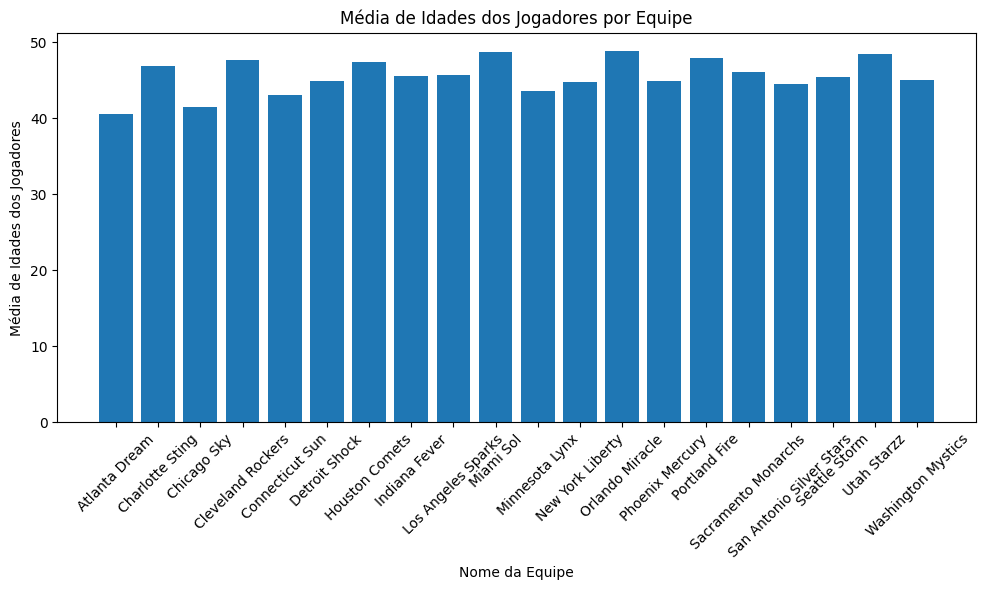

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

players_df = pd.read_csv('./modified_data/players.csv')
players_teams_df = pd.read_csv('./modified_data/players_teams.csv')
teams_df = pd.read_csv('./modified_data/teams.csv')

players_df = players_df[~players_df['birthDate'].str.startswith('0000')]

players_df['birthYear'] = players_df['birthDate'].str[:4].astype(int)
players_df['idade'] = 2023 - players_df['birthYear']

merged_df = players_teams_df.merge(players_df, left_on='playerID', right_on='bioID')

team_avg_age = merged_df.groupby('tmID')['idade'].mean().reset_index()

team_avg_age = team_avg_age.merge(teams_df, left_on='tmID', right_on='tmID')

plt.figure(figsize=(10, 6))
plt.bar(team_avg_age['name'], team_avg_age['idade'])
plt.xlabel('Nome da Equipe')
plt.ylabel('Média de Idades dos Jogadores')
plt.title('Média de Idades dos Jogadores por Equipe')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Checking for null values

In [ ]:
dataset.isna().sum()

### Data Encoding

In [ ]:
data_encoded = dataset.copy()

# Combine "AirportFrom" and "AirportTo" columns to create a unified set of airports
airports = pd.concat([data_encoded['AirportFrom'], data_encoded['AirportTo']])

# Perform label encoding on the combined set of airports
label_encoder_airports = LabelEncoder()
encoded_airports = label_encoder_airports.fit_transform(airports)

# Perform label encoding on the "Airline" column
label_encoder_airline = LabelEncoder()
data_encoded['Airline'] = label_encoder_airline.fit_transform(data_encoded['Airline'])

# Update "AirportFrom" and "AirportTo" columns with the encoded values
data_encoded['AirportFrom'] = encoded_airports[:len(data_encoded)]
data_encoded['AirportTo'] = encoded_airports[len(data_encoded):]

# Remove the "Flight" column
data_encoded = data_encoded.drop('Flight', axis=1)

#### Checking the correlation of values

In [ ]:
dataset_corr = data_encoded.corr()
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
sb.heatmap(dataset_corr, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 10});
plt.show()

### All Data Histogram

In [ ]:
data_encoded.hist(bins=30, figsize=(30, 16), sharey=False)

- Relation between the day of the week and delay in flights

In [ ]:
sb.catplot(x="DayOfWeek", kind="count", data=data_encoded, hue="Class")

- Relation between the airline and delay in flights

In [ ]:
sb.catplot(x="Airline", kind="count", data=data_encoded, hue="Class")

### The dataset is slightly imbalanced

In [ ]:
fraud_df_pie_chart = data_encoded.loc[data_encoded['Class'] == 1.0]
not_fraud_df_pie_chart = data_encoded.loc[data_encoded['Class'] == 0.0]

array_pie_chart = np.array([len(fraud_df_pie_chart), len(not_fraud_df_pie_chart)])
pie_chart_labels = ["Delayed", "Not Delayed"]

plt.pie(array_pie_chart, labels=pie_chart_labels, autopct='%.2f')
plt.show()

## Data Preprocessing

After examining the dataset and assessing its characteristics, we conducted a comprehensive analysis. The results revealed a high level of data consistency, with no missing values or notable outliers observed. As a consequence, the dataset demonstrated a remarkable level of readiness for analysis, requiring minimal data preprocessing efforts.

In [ ]:
data_encoded.info()

### Train and Test split data

Dividimos os dados em conjunto de input e label para os classificadores do Scikit. Label é a coluna Class and input é as restantes colunas

In [ ]:
data_encoded['Class'] = data_encoded['Class'].astype('category')

col_names = list(data_encoded.columns)
col_names.remove('Class')

inputs = data_encoded[col_names].values
labels = data_encoded['Class'].values

Resumidamente dividi dados em dados de teste e treinamento, mantendo a mesma distribuição das classes inicias, usando 1/4 do dataset original

- stratify - para manter a distribuição de classes 
- train_in - variável que armazena as características de treinamento
- test_in - variável que armazena as características de teste
- train_classes - armazena as classes dos dados de treinamento
- test_classes - armazena as classes dos dados de testes
- random_state - para garantir randomness na divisão de dados


In [ ]:
from sklearn.model_selection import train_test_split

(train_in,
 test_in,
 train_classes,
 test_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1, stratify=labels)


The data analyses showed us that our working dataset is unbalanced. We implemented both undersampling and oversampling. Undersampling removes samples from majority categories, while oversampling duplicates samples from minority categories. Generally oversampling is preferred

Conta a ocorrência de cada classe nos conjuntos de treinamento e teste. No training set, tem 224338 de 0 e 180198 de 1. Da um overview da distribuição das classes em cada conunto

In [ ]:
from collections import Counter

print("---Train Set---")
print(Counter(train_classes))
print("\n---Test Set---")
print(Counter(test_classes))

É usado para balancear os dados. Remove aleatoriamente dados da classe com maior número de dados até que se encontro o equilíbrio que se quer. Undersampling.

In [ ]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

us_inputs, us_labels = rus.fit_resample(train_in, train_classes)

print(Counter(us_labels))

Faz oversampling dos dados e conseguimos ver que realmente os dados ficaram equilibradoos nos dados de treino. aumenta o número de linhas, tornando-a mais proporcionsl à classe maioritaria<>

In [ ]:
from imblearn.over_sampling import SMOTE

ros = SMOTE()

os_inputs, os_labels = ros.fit_resample(train_in, train_classes)

print(Counter(os_labels))

We used a StandardScaler from SciKit Learn's preprocessing library to standardize the data. Porque é necessário para o K nearest neighbrs e o SVM

Fas-se a padronização dos dados para garantir que as características contribuam igualmente para os modelos de machine learning, e evita que uma caraterística em particular dominee o processo de learning da outra

In [ ]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(train_in)
train_in = scaler.fit_transform(train_in)
test_in = scaler.fit_transform(test_in)

scaler.fit(os_inputs)
os_inputs = scaler.fit_transform(os_inputs)

scaler.fit(us_inputs)
us_inputs = scaler.fit_transform(us_inputs)

# Classification

## K-Nearest Neighbors

### Original Dataset

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifier = KNeighborsClassifier()
classifier.fit(train_in, train_classes)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

knn_og_report = classification_report(test_classes, y_pred,output_dict=True)

### Undersampled Dataset

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(us_inputs, us_labels)
y_pred = classifier.predict(test_in)

knn_confusion_matrix = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(knn_confusion_matrix)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print(result1)

knn_us_report = classification_report(test_classes, y_pred, output_dict=True)

### Oversampled Dataset

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(os_inputs, os_labels)
y_pred = classifier.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1)

knn_os_report = classification_report(test_classes, y_pred,output_dict=True)

## Decision Tree Classifier

### Original Dataset

Confusion matrix:
TP FP
TN FN
FP = False Positive - deu que iam atrasar (1) mas na realidade é 0

Precision - mede a proporção de dados corretamente calculado TP/(TP+FP)

Accuracy - mede a correção no geral (TP + TN) / (TP + TN + FP + FN).
    - em dados não balenciados pode ser misleading

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(train_in, train_classes)
dtc_prediction = dtc.predict(test_in)

dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Original dataset ---\n")
print("Confusion matrix:")
print(f"{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:")
print(f"{classification_report(test_classes, dtc_prediction)}\n")


### Undersampled Dataset

In [ ]:
dtc.fit(us_inputs, us_labels)
dtc_prediction = dtc.predict(test_in)

dtc_us_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

### Oversampled Data

In [ ]:
dtc.fit(os_inputs, os_labels)
dtc_prediction = dtc.predict(test_in)

dtc_os_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

## SVM

### Original Dataset

In [ ]:
svc = SVC()

svc.fit(train_in, train_classes)
y_pred = svc.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

svc_og_report = classification_report(test_classes, y_pred,output_dict=True)

### Undersampled Dataset

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(us_inputs, us_labels)
y_pred = svc.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

svc_us_report = classification_report(test_classes, y_pred,output_dict=True)

### Oversampled Dataset

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(os_inputs, os_labels)
y_pred = svc.predict(test_in)

result = confusion_matrix(test_classes, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_classes, y_pred)
print("Classification Report:",)
print (result1) 

svc_os_report = classification_report(test_classes, y_pred,output_dict=True)

## Result Analyses

### All algorithms

In [ ]:

all_algorithms_data = pd.read_csv('models_comparison.csv', na_values=['NA'], delimiter=",")
all_algorithms_data.set_index("Model", inplace=True)

sb.heatmap(all_algorithms_data, cmap="YlGnBu", annot=True)
plt.xlabel('Results')
plt.ylabel('ML Models')
plt.show()


### Selected algorithms

In [ ]:

selected_algorithms_data = pd.read_csv('models_comparison_selected.csv', na_values=['NA'], delimiter=",")
selected_algorithms_data.set_index("Model", inplace=True)

sb.heatmap(selected_algorithms_data, cmap="YlGnBu", annot=True)
plt.xlabel('Results')
plt.ylabel('ML Models')
plt.show()


### Comparing Accuracys of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Accuracy'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Accuracy', data=selected_algorithms_data, color='#A7226E')

# Set the plot title and axis labels
plt.title('Accuracy Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing AUC (Area Under Curve) of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['AUC'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='AUC', data=selected_algorithms_data, color='#FE4365')

# Set the plot title and axis labels
plt.title('AUC Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('AUC')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Recall of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Recall'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Recall', data=selected_algorithms_data, color='#9DE0AD')

# Set the plot title and axis labels
plt.title('Recall Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Precision of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Precision'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Precision', data=selected_algorithms_data, color='#F7DB4F')

# Set the plot title and axis labels
plt.title('Precision Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing F1-score of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['F1'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='F1', data=selected_algorithms_data, color='#F26B38')

# Set the plot title and axis labels
plt.title('F1-Score Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('F1-Score')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Kappa of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['Kappa'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='Kappa', data=selected_algorithms_data, color='#2F9599')

# Set the plot title and axis labels
plt.title('Kappa Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Kappa')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Matthews Correlation Coefficient of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['MCC'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='MCC', data=selected_algorithms_data, color='#FF4E50')

# Set the plot title and axis labels
plt.title('Matthews Correlation Coefficient Comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Matthews Correlation Coefficient')

plt.xticks(rotation=90)

# Display the plot
plt.show()

### Comparing Training Time (sec) of each algorythm

In [ ]:
selected_algorithms_data = selected_algorithms_data.sort_values(by=['TT (Sec)'], ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=selected_algorithms_data.index, y='TT (Sec)', data=selected_algorithms_data, color='#9DE0AD')

# Set the plot title and axis labels
plt.title('Training Time comparison by Algorithm')
plt.xlabel('Model')
plt.ylabel('Training Time (Sec)')

plt.xticks(rotation=90)

# Display the plot
plt.show()